In [363]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [392]:
insurance_data = pd.read_csv('insurance.csv')
ins = pd.read_csv('insurance.csv')

In [365]:
insurance_data.dtypes

age         float64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [366]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [367]:
insurance_data.describe()

,age,bmi,children,charges
count,1328.000000,1338.000000,1338.000000,1338.000000
mean,39.237199,30.663397,1.094918,13270.422265
std,14.065845,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [368]:
insurance_data.isna().sum() #sum of all of the values missing.

age         10
sex          5
bmi          0
children     0
smoker       0
region       0
charges      0
dtype: int64

In [369]:
sex_data = insurance_data['sex'].mode()[0]
insurance_data['sex'] = insurance_data['sex'].fillna(sex_data)

In [370]:
age = insurance_data['age'].mean()
insurance_data['age'] = insurance_data['age'].fillna(age)

In [371]:
insurance_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [372]:
insurance_data.dtypes

age         float64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [373]:
insurance_data['sex'].unique()

array(['female', 'male'], dtype=object)

In [374]:
le = LabelEncoder()

insurance_data['sex_encoded'] = le.fit_transform(insurance_data['sex'])
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,sex_encoded
0,19.0,female,27.900,0,yes,southwest,16884.92400,0
1,18.0,male,33.770,1,no,southeast,1725.55230,1
2,28.0,male,33.000,3,no,southeast,4449.46200,1
3,33.0,male,22.705,0,no,northwest,21984.47061,1
4,32.0,male,28.880,0,no,northwest,3866.85520,1


In [375]:
insurance_data = insurance_data.drop('sex', axis = 1)

In [376]:
insurance_data.head()

,age,bmi,children,smoker,region,charges,sex_encoded
0,19.0,27.900,0,yes,southwest,16884.92400,0
1,18.0,33.770,1,no,southeast,1725.55230,1
2,28.0,33.000,3,no,southeast,4449.46200,1
3,33.0,22.705,0,no,northwest,21984.47061,1
4,32.0,28.880,0,no,northwest,3866.85520,1


In [377]:
le2 = LabelEncoder()

insurance_data['smoker_encoded'] = le2.fit_transform(insurance_data['smoker'])
insurance_data.head()

,age,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded
0,19.0,27.900,0,yes,southwest,16884.92400,0,1
1,18.0,33.770,1,no,southeast,1725.55230,1,0
2,28.0,33.000,3,no,southeast,4449.46200,1,0
3,33.0,22.705,0,no,northwest,21984.47061,1,0
4,32.0,28.880,0,no,northwest,3866.85520,1,0


In [378]:
insurance_data = insurance_data.drop('smoker', axis = 1)

In [379]:
insurance_data.tail()

,age,bmi,children,region,charges,sex_encoded,smoker_encoded
1333,50.0,30.97,3,northwest,10600.5483,1,0
1334,18.0,31.92,0,northeast,2205.9808,0,0
1335,18.0,36.85,0,southeast,1629.8335,0,0
1336,21.0,25.80,0,southwest,2007.9450,0,0
1337,61.0,29.07,0,northwest,29141.3603,0,1


In [380]:
avg_age = insurance_data['age'].mean()
print(avg_age)

39.23719879518072


In [381]:
avg_male_age = insurance_data.loc[insurance_data['sex_encoded'] == 1, 'age'].mean()
print(avg_male_age)

38.94465860496478


In [382]:
avg_female_age = insurance_data.loc[insurance_data['sex_encoded'] == 0, 'age'].mean()
print(avg_female_age)

39.538617291624774


In [383]:
most_frequent_value = insurance_data['sex_encoded'].value_counts().idxmax()
print(most_frequent_value)

1


In [384]:
insurance_data.head()

,age,bmi,children,region,charges,sex_encoded,smoker_encoded
0,19.0,27.900,0,southwest,16884.92400,0,1
1,18.0,33.770,1,southeast,1725.55230,1,0
2,28.0,33.000,3,southeast,4449.46200,1,0
3,33.0,22.705,0,northwest,21984.47061,1,0
4,32.0,28.880,0,northwest,3866.85520,1,0


In [385]:
print(insurance_data['charges'].min())

1121.8739


In [386]:
print(insurance_data['charges'].max())

63770.42801


In [387]:
avg_charge_r = insurance_data.groupby('region')['charges'].mean()
print(avg_charge_r)

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


In [388]:
avg_charge_s = insurance_data.groupby('sex_encoded')['charges'].mean()
print(avg_charge_s)

sex_encoded
0    12543.234890
1    13976.190277
Name: charges, dtype: float64


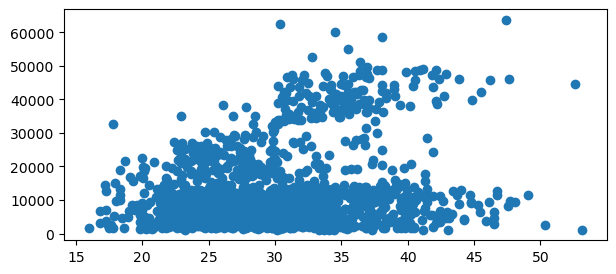

In [389]:
plt.figure(figsize=(7,3))
scatter = plt.scatter(x=insurance_data['bmi'], y=insurance_data['charges'])


In [390]:
features = insurance_data.drop('charges', axis =1)
target = insurance_data['charges']

x = features
y = target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1070, 6)
(1070,)
(268, 6)
(268,)


In [391]:
lin1 = LinearRegression()
lin1.fit(x_train, y_test)

lin_pred = lin1.predict(y_test)
print(lin_pred)

ValueError: could not convert string to float: 'southwest'

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(x_train, y_test)

y_pred = knn1.predict(y_test)
print(metrics.accuracy_score(y, y_pred))

ValueError: could not convert string to float: 'southwest'

In [ ]:
reg1 = RandomForestRegressor()

reg1 = RandomForestRegressor()
reg1.fit(x_train, y_train)
reg1_pred = reg1.predict(x_test)

reg_mae = metrics.mean_absolute_error(y_test, reg1_pred)
reg_mse = metrics.mean_squared_error(y_test, reg1_pred)
r2 = metrics.r2_score(y_test, reg1_pred)

ValueError: could not convert string to float: 'southwest'

In [393]:
ins['age'] = ins['age'].fillna(ins['age'].mean)
ins['sex'] = ins['sex'].fillna(ins['sex'].mode()[0])
ins = pd.get_dummies(ins, columns=['sex', 'region', 'smoker'])

ins.head()

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19.0,27.900,0,16884.92400,True,False,False,False,False,True,False,True
1,18.0,33.770,1,1725.55230,False,True,False,False,True,False,True,False
2,28.0,33.000,3,4449.46200,False,True,False,False,True,False,True,False
3,33.0,22.705,0,21984.47061,False,True,False,True,False,False,True,False
4,32.0,28.880,0,3866.85520,False,True,False,True,False,False,True,False
